<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/main/7_MedImp_nii_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NIfTI-1 Data Format Visualization


Note the difference between NIfTI and DICOM formats: With NIfTI files, images and other data are stored in 3D format. It was specifically designed this way to overcome the spatial orientation challenges of other medical image file formats. On the other hand, DICOM image files and related data are made up of 2D layers.

In [6]:
!pip install kaggle

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [8]:
mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d andrewmvd/liver-tumor-segmentation

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
liver-tumor-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip liver-tumor-segmentation.zip

Archive:  liver-tumor-segmentation.zip
replace segmentations/segmentation-0.nii? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
!pip install nibabel

In [12]:
import nibabel
import numpy as np

from matplotlib import cm
from matplotlib import pyplot as plt

We read the file using the `load` method, and to get the image you need to use the `get_fdata` function. We will work with the file `volume_pt5/volume-44.nii`

In [13]:
filepath = 'volume_pt5/volume-44.nii'
imagedata = nibabel.load(filepath)
array   = imagedata.get_fdata()

Additionally, try to rotate the image 90 degrees and look at the shape of the file contents.

In [14]:
array   = np.rot90(np.array(array))
print(array.shape)

(512, 512, 119)


The output will be Height x Width x Depth - `(512, 512, 119)`. Depth here means CT slices. Let's visualize 50 and 118 CT slices.

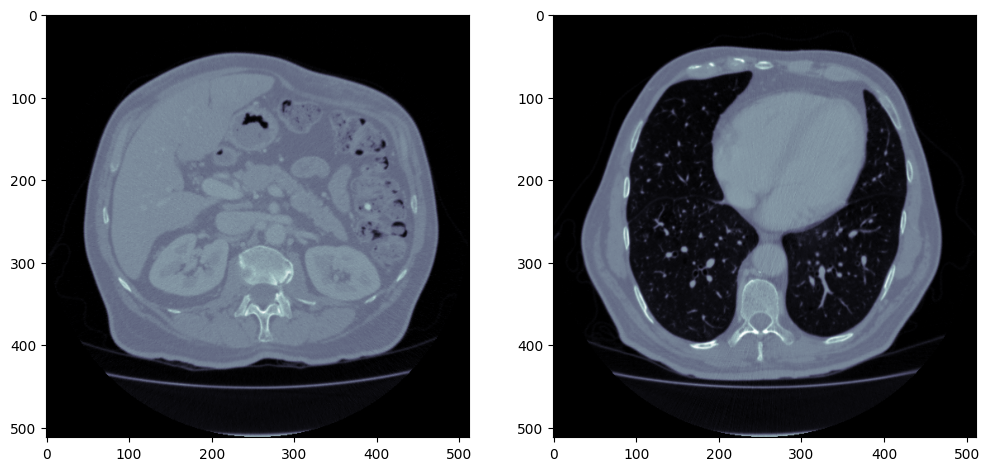

In [16]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(array[...,50].astype(np.float32), cmap=plt.cm.bone)
ax2.imshow(array[...,118].astype(np.float32), cmap=plt.cm.bone)

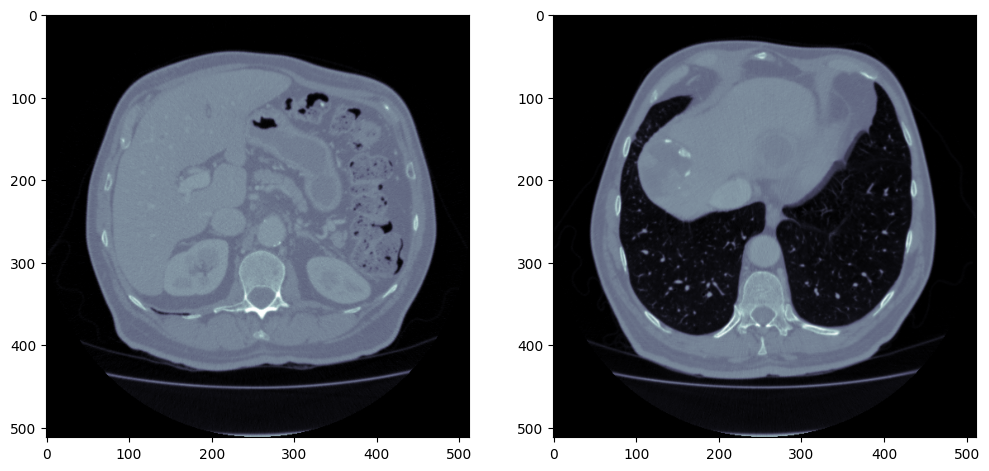

In [17]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
# Visualize CT slice 60
ax.imshow(array[...,60].astype(np.float32), cmap=plt.cm.bone)
# Visualize CT slice 100
ax2.imshow(array[...,100].astype(np.float32), cmap=plt.cm.bone)
plt.show()

**Task 1** visualize other CT slices.

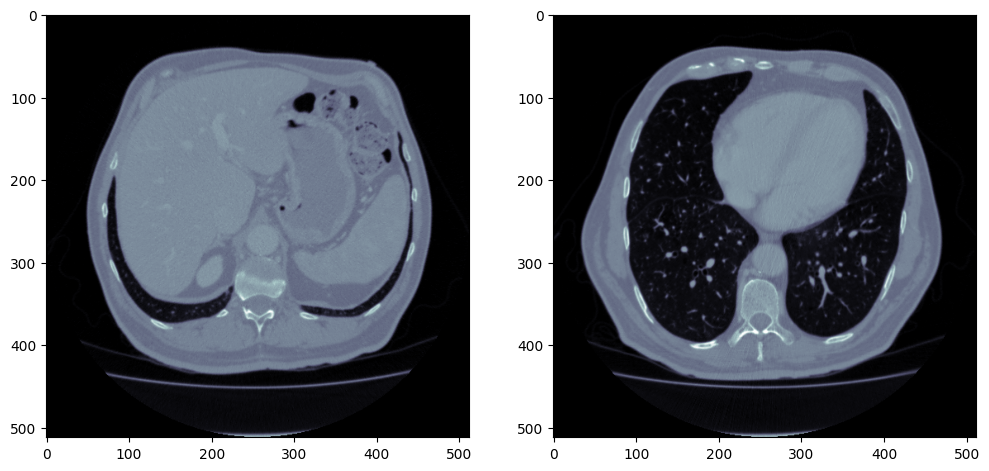

In [25]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
# Visualize CT slice 75
ax.imshow(array[...,75].astype(np.float32), cmap=plt.cm.bone)
# Visualize CT slice 118
ax2.imshow(array[...,118].astype(np.float32), cmap=plt.cm.bone)
plt.show()

# Windowing?

Windowing is a process by which the appearance of an image is changed to highlight certain structures. This is achieved by displaying gray levels, contrast stretching, histogram modification, or contrast enhancement. The brightness of the image is adjusted by the window level. The contrast is adjusted by the window width.

**Hounsfield Units (HU)** are dimensionless units that are commonly used in computed tomography (CT) to express CT numbers in a standardized and convenient form. Hounsfield units are obtained by linearly transforming the measured attenuation coefficients.

**Attenuation coefficient** is a measure of how easily a material can be penetrated by an incident beam of energy (such as ultrasound or x-rays). It determines how much the beam is attenuated by the material it passes through. This conversion is based on arbitrarily given densities of air and pure water:

*radiodensity of distilled water at standard temperature and pressure (STP) = 0 HU
* air radio density at STP = -1000 HU

Note: STP = standard temperature 0°C and pressure 10^5 pascals (i.e. sea level). The resulting scale ranges from -1000 HU for air to +~2000 HU for very dense bone and over 3000 HU for metals. Typically, CT images are 12-bit and can store values from -1024 to 3071.

**Window width**

The transition from dark to light structures will occur over a larger transition area towards a narrow window width (<1000 HU). Accordingly, a significantly wide window (>2000 HU) will result in the various attenuations between soft tissues being obscured.

**Wide Window** defined as 400-2000 HU, best used in lung or cortical tissue where air and blood vessels can be close together.

**Narrow Window** is defined as 50-350 HU and is excellent for soft tissue examination.

**Window level/center**

**Window Level/Center (WL)**, often also called window center, is the midpoint of the range of displayed values. As the window level decreases, the CT image becomes brighter and vice versa.

**Calculation of upper and lower gray levels**

When WW and WL are presented, the upper and lower gray levels can be calculated, i.e. values above x will be white and values below y will be black.

* upper gray level (x) is calculated via WL + (WW ÷ 2)
*lower gray level (y) is calculated via WL - (WW ÷ 2)

For example, a brain CT scan has W: 80 L: 40, so all values above +80 will be white and all values below 0 will be black.



**Typical Window Widths and Levels**

Typical values may vary by facility or equipment supplier; window widths and centers are usually quite similar. Below are the width and level (W: x L: y) values in Hounsfield Units (HU).

     Head and neck
         brain W: 80 L: 40
         subdural hemorrhage W: 130-300 L: 50-100
         stroke W: 8 L: 32 or W: 40 L: 40
         temporal bones W: 2800 L: 600
         soft fabrics: W: 350–400 L: 20–60
     Rib cage
         light W: 1500 L: -600
         mediastinum W: 350 L: 50
     Abdomen
         soft fabrics W: 400 L: 50
         liver W: 150 L: 30
     Spine
         soft fabrics W: 250 L: 50
         bone W: 1800 L: 400
         

**How many bits are CT images and how many Hounsfield units are they typically stored in?**

Please choose the correct answer:

* 10-bit, -128 to +895
* 8-bit, 0 to 255
* 12-bit, -1024 to +3071 ✅
* 8-bit, -128 to +127
* 10-bit, from 0 to 1023
* 12-bit, 0 to 4095

# Practice

In [26]:
# Let's move on to practice. As an example, we will use a CT image that is already familiar to us.

filepath = 'volume_pt5/volume-44.nii'
imagedata = nibabel.load(filepath)
array   = imagedata.get_fdata()
array   = np.rot90(np.array(array))

In [27]:
# Additionally, we need the *windowed* function, which takes the image, width and level of the window as input.

def windowed(px, w, l):
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)


In [28]:
# Let's check the difference before and after the conversion. Since we have liver segmentation and abdominal CT, we will use the values W: 150 L: 30:

print(array[...,50].astype(np.float32))
print()
print(windowed(array[...,50].astype(np.float32), 150, 30))


[[-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 ...
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


What code is recommended for abdominal soft tissue?

Please choose the correct answer:

windowed(array[...,50].astype(np.float32), 1800, 400)
windowed(array[...,50].astype(np.float32), 350, 50)
windowed(array[...,50].astype(np.float32), 400, 50)
windowed(array[...,50].astype(np.float32), 80, 40)

What code is recommended for the temporal bone? Please choose the correct answer:

windowed(array[...,50].astype(np.float32), 400, 50)
windowed(array[...,50].astype(np.float32), 1800, 400)
windowed(array[...,50].astype(np.float32), 2800, 600)
windowed(array[...,50].astype(np.float32), 80, 40)

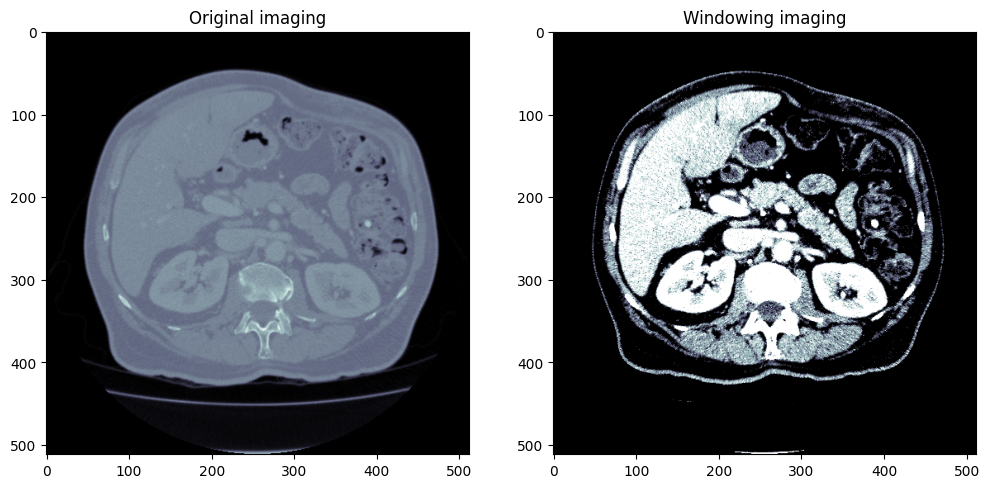

In [29]:
# Let's render the image before and after the transformation.

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(array[...,50].astype(np.float32), cmap=plt.cm.bone)
ax.title.set_text('Original imaging')
ax2.imshow(windowed(array[...,50].astype(np.float32), 150,30), cmap=plt.cm.bone)
ax2.title.set_text('Windowing imaging')

Indeed, after application, Windowing highlights structures more.

We have discussed the recommended Windowing settings. Let's look at more exotic options. For example, you can mix Windowing.

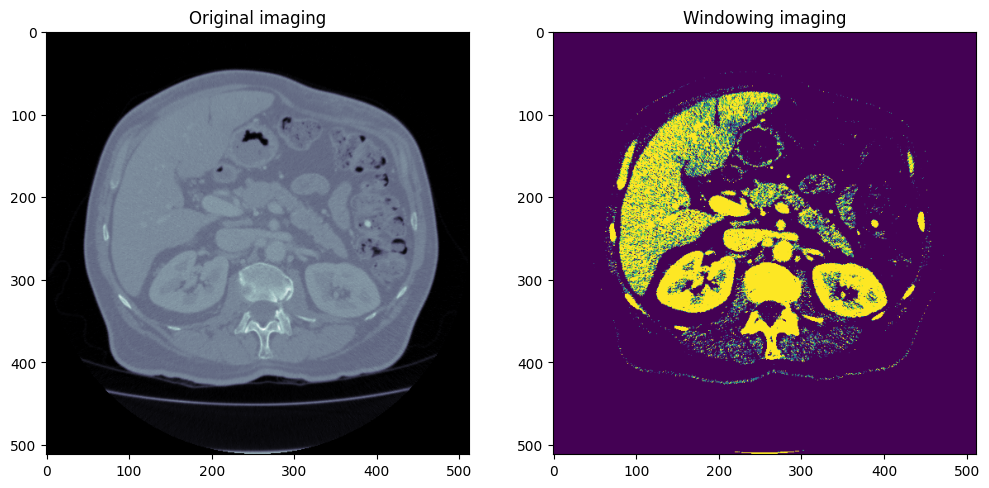

In [30]:
def rainbow_bsb_window(img):
    brain_img = windowed(img, 40, 80)
    subdural_img = windowed(img, 80, 200)
    bone_img = windowed(img, 600, 2000)
    combo = (brain_img*0.3 + subdural_img*0.5 + bone_img*0.2)
    return combo

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(array[...,50].astype(np.float32), cmap=plt.cm.bone)
ax.title.set_text('Original imaging')
ax2.imshow(rainbow_bsb_window(array[...,50].astype(np.float32)))
ax2.title.set_text('Windowing imaging')

Tasks try other Windowing. Evaluate the result.

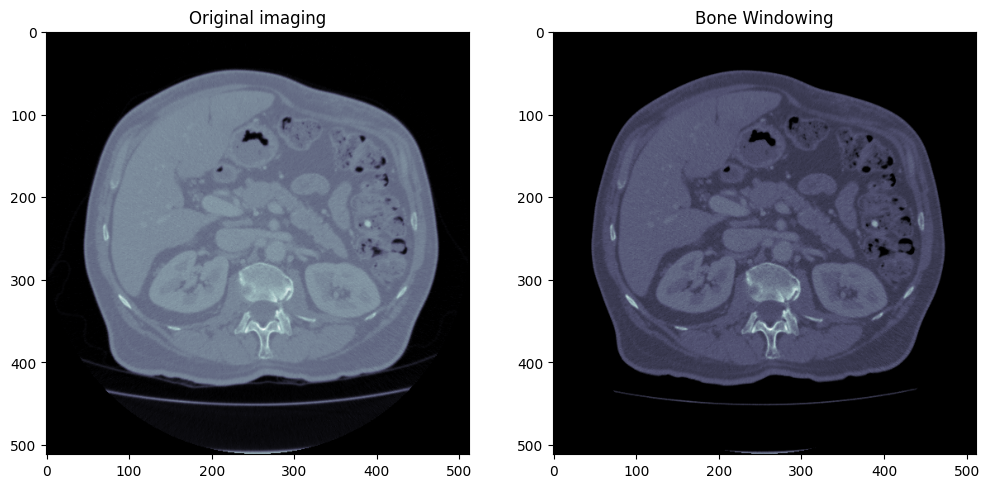

In [31]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(array[...,50].astype(np.float32), cmap=plt.cm.bone)
ax.title.set_text('Original imaging')
# Using bone window settings (W: 1800 L: 400)
ax2.imshow(windowed(array[...,50].astype(np.float32), 1800, 400), cmap=plt.cm.bone)
ax2.title.set_text('Bone Windowing')
plt.show()

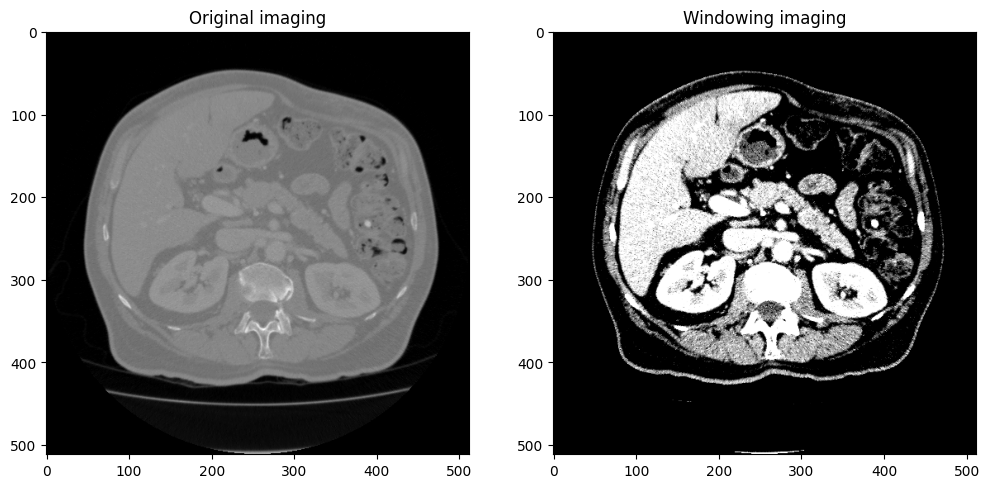

In [33]:
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(array[...,50].astype(np.float32), cmap=plt.cm.gray) # Changed cmap to gray
ax.title.set_text('Original imaging')
ax2.imshow(windowed(array[...,50].astype(np.float32), 150,30), cmap=plt.cm.gray) # Changed cmap to gray
ax2.title.set_text('Windowing imaging')
plt.show()